In [4]:
#Exploration of New product - September 2021
#Section with PCs and with Levels
import datetime as dt
import glob
import netCDF4 as nc
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import gsw

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

os.getcwd()
pathMon = '/home/datawork-lops-bluecloud/osnet/product_out/exp1_TS/clean/'
pathOS = '/home/datawork-lops-bluecloud/osnet/'
pathfig = '/home1/datawork/epauthen/Fig_Product/Figure_clean/'


In [5]:
%%time
#Plot section with longitude fixed
#Test on the product for 2016 January 01
t = '1993-10-07'
yy = t[0:4]
mm = t[5:7]
dd = t[8:10]

ds = xr.open_dataset(pathMon + 'OSnet_GS_'+ yy + mm +'.nc')
ds.load()

CPU times: user 10.1 ms, sys: 195 ms, total: 205 ms
Wall time: 509 ms


<xarray.Dataset>
Dimensions:    (time: 31, latitude: 108, longitude: 194, depth: 51)
Coordinates:
  * depth      (depth) int64 0 1 2 3 4 5 6 8 ... 565 628 697 773 857 950 1000
  * time       (time) datetime64[ns] 1993-10-01 1993-10-02 ... 1993-10-31
  * latitude   (latitude) float64 23.12 23.38 23.62 23.88 ... 49.38 49.62 49.88
  * longitude  (longitude) float64 -78.38 -78.12 -77.88 ... -30.62 -30.38 -30.12
Data variables:
    mld        (time, latitude, longitude) float32 nan nan nan ... 60.0 60.0
    temp       (time, latitude, longitude, depth) float32 nan nan ... 4.371
    psal       (time, latitude, longitude, depth) float32 nan nan ... 34.93
    temp_std   (depth, time, latitude, longitude) float32 nan nan ... 0.123
    psal_std   (depth, time, latitude, longitude) float32 nan nan ... 0.01487

In [6]:
#Map of TS
proj=ccrs.PlateCarree()
land_feature = cfeature.NaturalEarthFeature(
category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
extent = np.array([-80, -30, 23, 47.5])
subplot_kw = {'projection': proj, 'extent': extent}

#To get the bathymetry
ds_bat = xr.open_dataset('/home/datawork-lops-bluecloud/osnet/bathymetry_GulfStream.nc')
ds_bat = ds_bat.where(ds_bat.LONGITUDE<(-40),-1500)
ds_bat = ds_bat.where(((ds_bat.LONGITUDE>(-68)) & (ds_bat.LATITUDE>(30)) & (ds_bat.LATITUDE<(40)))==False,-1500)
kw = {'levels':[-1000], 'colors':['black'],'linewidths':[1],'linestyles':['solid']}

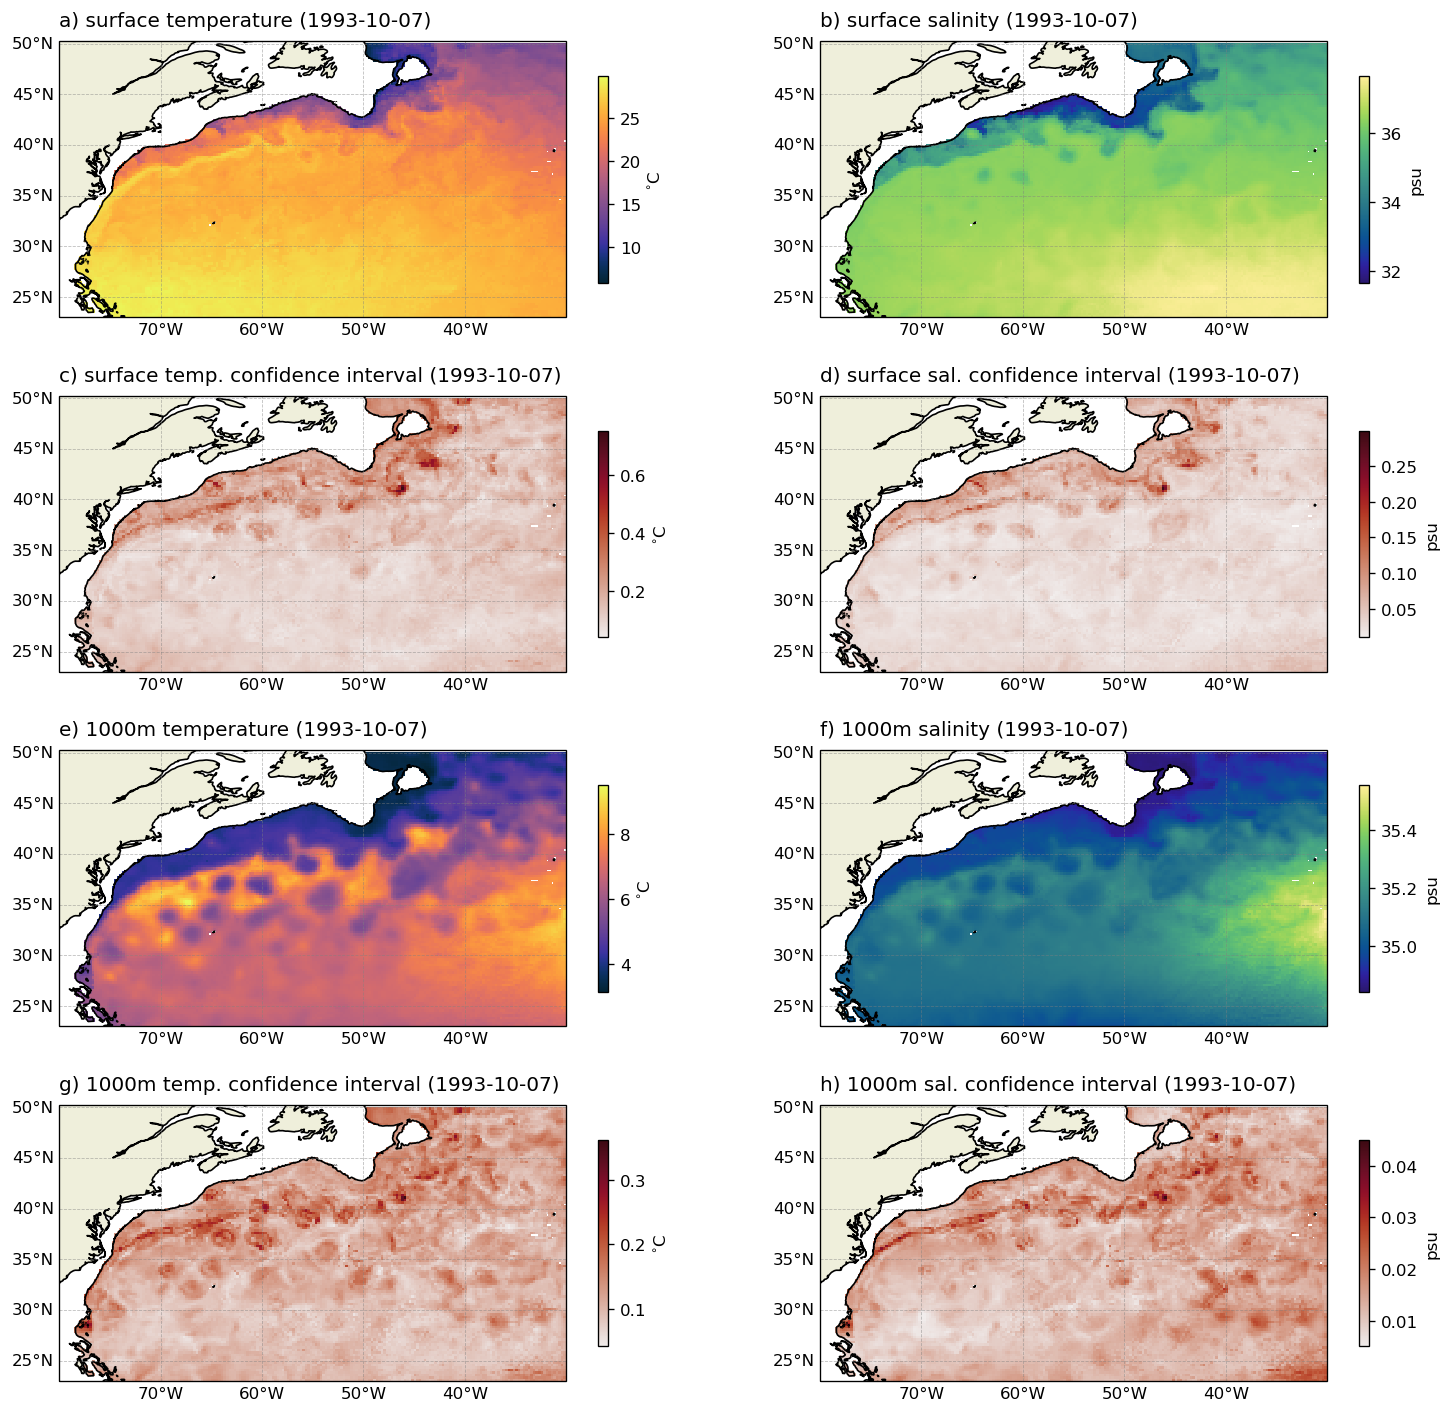

In [14]:
d = 0

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

for i in [0,2]:
    if i==0:
        d = 0
        ax[i+0,0].set_title('a) surface temperature (' + t + ')',loc = 'left')
        ax[i+0,1].set_title('b) surface salinity (' + t + ')',loc = 'left')
        ax[i+1,0].set_title('c) surface temp. confidence interval (' + t + ')',loc = 'left')
        ax[i+1,1].set_title('d) surface sal. confidence interval (' + t + ')',loc = 'left')
    if i==2:
        d = 1000
        ax[i+0,0].set_title('e) 1000m temperature (' + t + ')',loc = 'left')
        ax[i+0,1].set_title('f) 1000m salinity (' + t + ')',loc = 'left')
        ax[i+1,0].set_title('g) 1000m temp. confidence interval (' + t + ')',loc = 'left')
        ax[i+1,1].set_title('h) 1000m sal. confidence interval (' + t + ')',loc = 'left')
        
    cb = ds['temp'].sel(time = t,depth = d).plot(ax=ax[i+0,0],center = False,
                  cmap=cmocean.cm.thermal,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"shrink": 0.7,"label":'$^{\circ}$C'})

    ds['psal'].sel(time = t,depth = d).plot(ax=ax[i+0,1],
                  cmap=cmocean.cm.haline,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"shrink": 0.7,"label":'psu'})

    ds['temp_std'].sel(time = t,depth = d).plot(ax=ax[i+1,0],
                  cmap=cmocean.cm.amp,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"shrink": 0.7,"label":'$^{\circ}$C'})

    ds['psal_std'].sel(time = t,depth = d).plot(ax=ax[i+1,1],
                  cmap=cmocean.cm.amp,
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"shrink": 0.7,"label":'psu'})

for i in np.arange(4):
    for j in np.arange(2):
        ds_bat['bathymetry'].plot.contour(**kw,ax = ax[i,j])
        ax[i,j].add_feature(land_feature, edgecolor='black')
        gl = ax[i,j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False

plt.savefig(pathfig + 'TSmap'+str(t)+'.png', transparent=False)
plt.show()